<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Depolarización de LIPSS </font>
</div>


    
<div align="center"> 
<font size=6> Generación de perfiles rugosos </font>
</div>

- **Para**: Paper depolarización de lipss

- **Objetivos**: Demo de uso para generación de archivos txt con perfiles rugosos de LIPSS

- **Descripción** En profile_comsol_v2-funcion,ipynb he generado un script con el desarrollo de las funciones necesarias para crear funciones (x, f(x)) que representen perfiles. Las funciones son:

    - *Generación de rugosidad*:
      - roughness_Fourier: Rugosidad con un espectro de fourier predeterminado
      - roughness_convolution: Rugosidad con una std y lc predeterminadas
     
    - *Generación de perfiles*:
      - profile_supergaussian_periodical: perfil periódico.
      - profile_supergaussian: Perfil controlado por valores dados en listas, un valor por cada periodo.


    - *Matemáticas*:
      - compute_variogram: Variograma, para calcular sc (valor máximo) y lc longitud de correlación. Tiene la ventaja que es mucho más suaven
      - profile_parameters: Determina los valores de un perfil...hay que sintonizar.
      - rand_parameters: Dado una media y una std, genera los valores para los perfiles.


    - *Utilidades*:
      - draw_profile: Dibuja un perfil
      - save_profile: Guarda un perfil.


Lo mejor de esto será crear una clase que lo aglutine todo, pero lo dejamos para siguiente nivel.

Este archivo está para ver cómo se unsan las funciones
                                   


- **Fecha**: 2023/10/30
        
- **Autores**: 
    - Luis Miguel Sánchez Brea
    - Javier Alda Serrano
    - Mahmoud Elshorgaby

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffractio import np, plt, sp
from diffractio import degrees, mm, um, nm
from matplotlib import rcParams


from py_aocg.LIPSS.depolarization import Generate_rough_surface, rand_parameters

In [6]:
rcParams['figure.figsize']=(20,4)

#hay que ejecutarlo 2 veces

In [7]:
x=np.linspace(-20*um, 20*um, 1024)

exp_1 = Generate_rough_surface(x=x)



# Generación de rugosidad

## Rugosidad con el método de convolución

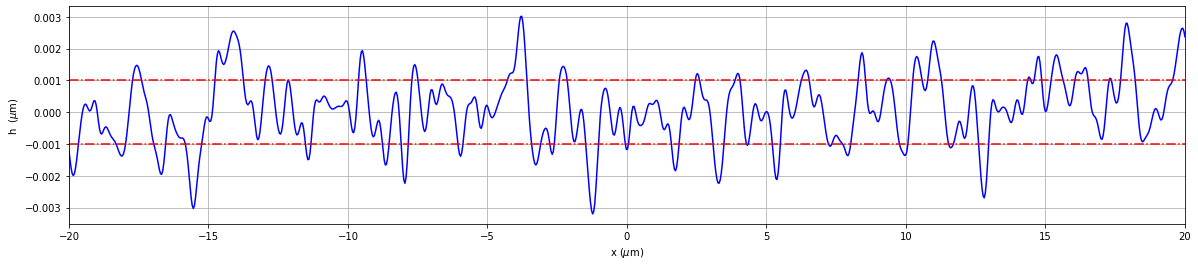

In [8]:
# Defining parameters

ruido = exp_1.roughness_convolution(lc_noise=.252*um, std_noise=1*nm, has_draw=True)

## Rugosidad con el método del espectro

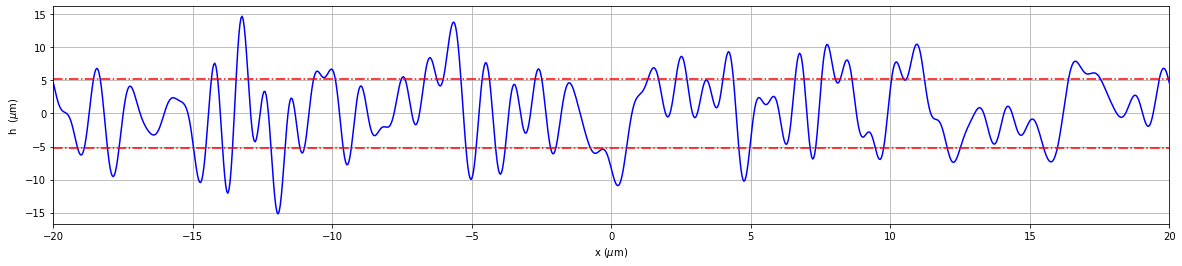

In [9]:
# Defining parameters

exp_1.roughness_Fourier(num_orders=50,spectrum=None,  has_draw=True)

# Generación de perfiles

## Perfil único

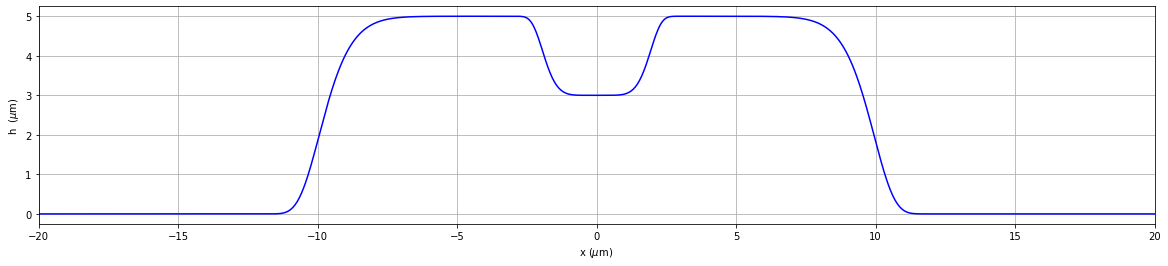

In [10]:
period = 20*um 

params_supergaussian = {}
params_supergaussian['x0']=0*um
params_supergaussian['h1']=5*um
params_supergaussian['sigma1']=10*um
params_supergaussian['beta1']=14.5
params_supergaussian['h2']=2*um
params_supergaussian['sigma2']=2*um
params_supergaussian['beta2']=6

y = exp_1.profile_supergaussian_periodical(num_periods=1, **params_supergaussian)


<div class="alert alert-block alert-success">
    
<b>Nota:</b>
    
Los parámetros se pueden meter 1 a 1, pero también como un dicccionario. Esto es más fácil porque así no se escribe tanto.
    
</div>



## Perfil con cuatro periodos

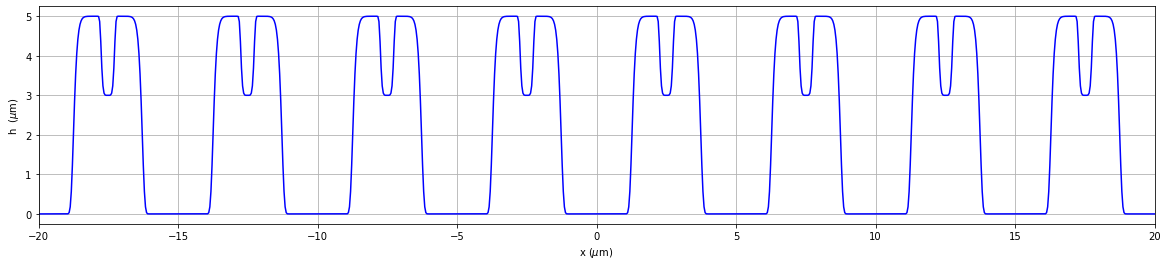

In [11]:
y = exp_1.profile_supergaussian_periodical(num_periods=8, **params_supergaussian)

# Generador de valores aleatorios

Aquí generamos dos distribuciones de datos con una cierta aleatoriedad. He generado dos ejemplos, uno con distribución normal y otro con distribucion uniforme.

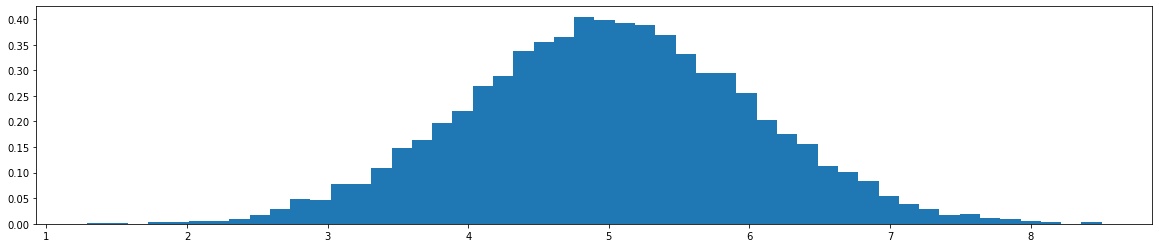

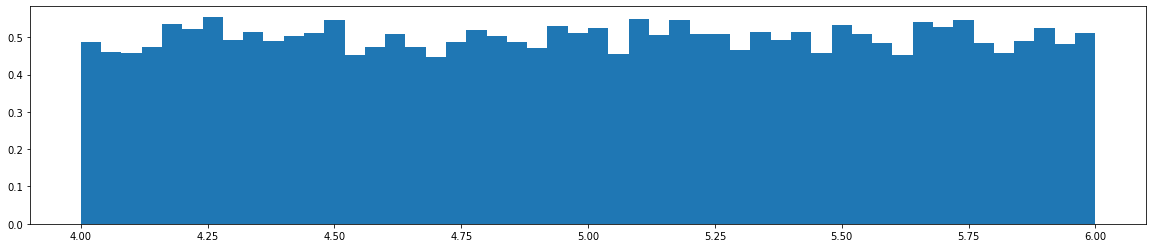

In [12]:
normal = rand_parameters(10000, 5,1, 'normal')
uniform = rand_parameters(10000, 5,1, 'uniform')

plt.hist(normal,50, density=True)
plt.figure()
plt.hist(uniform,50, density=True)


# Generador de perfiles

## Sin aleatoriedad

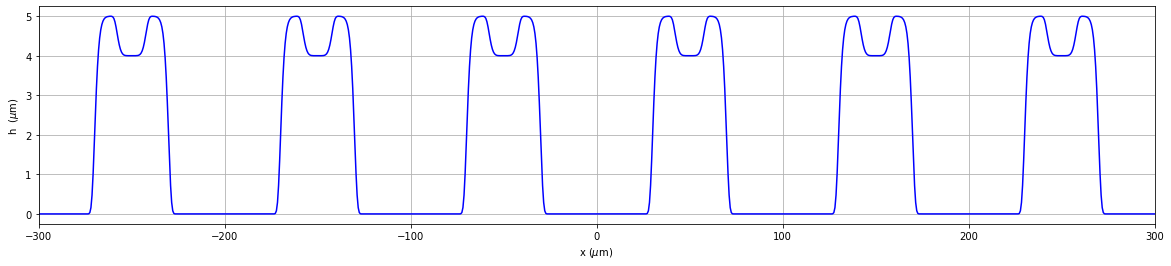

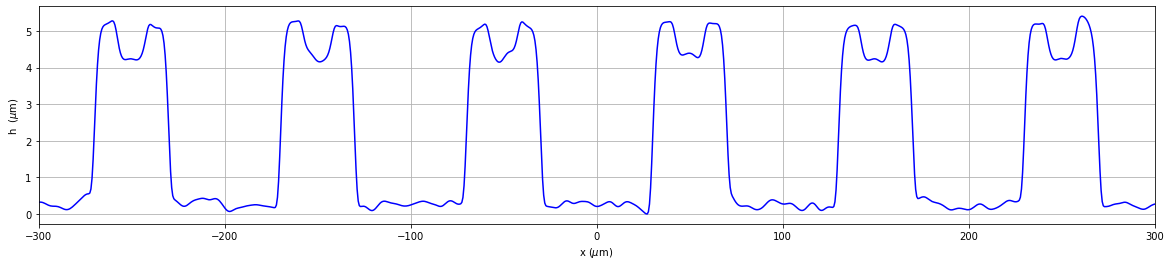

In [14]:
period = 100*um 
num_periods = 6
params_supergaussian = {}
params_supergaussian['x0']=0*um
params_supergaussian['h1']=5*um
params_supergaussian['sigma1']=20*um
params_supergaussian['beta1']=14*um
params_supergaussian['h2']=1*um
params_supergaussian['sigma2']=8*um
params_supergaussian['beta2']=6*um


x = np.linspace(-period/2*num_periods, period/2*num_periods, 1024)

exp_2 = Generate_rough_surface(x=x)

#sin ruido profile, profile_noise = 
asdf = exp_2.profile_supergaussian(period= period, num_periods=num_periods, std_noise=0.0*um, lc_noise=5*um,  **params_supergaussian)

#con ruido profile, profile_noise = 
exp_2.profile_supergaussian(period= period, num_periods=num_periods, std_noise=0.1*um, lc_noise=5*um,  **params_supergaussian)


## Aleatoriedad en solamente 1 parámetro

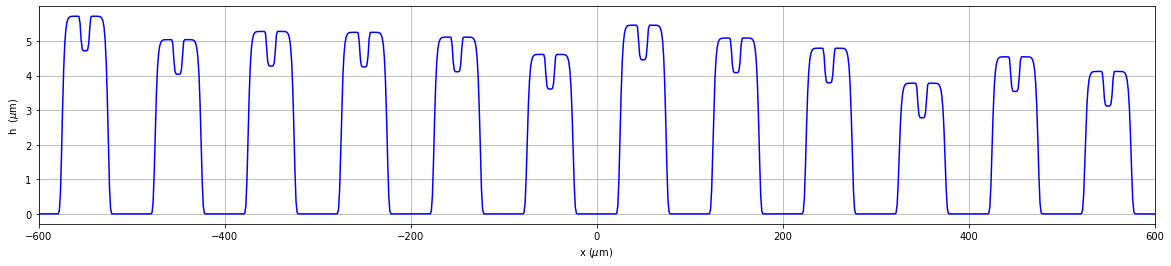

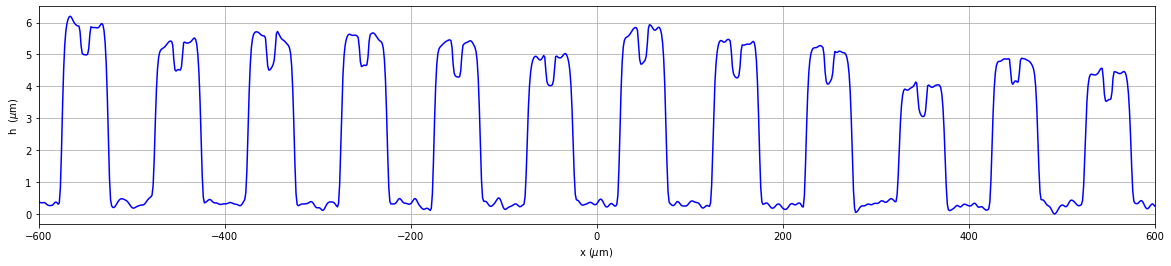

In [32]:
period = 100*um 
num_periods = 12
params_supergaussian = {}
params_supergaussian['x0']=0*um
params_supergaussian['h1']=rand_parameters(num_periods, 5, .5)
params_supergaussian['sigma1']=25*um
params_supergaussian['beta1']=14*um
params_supergaussian['h2']=1*um
params_supergaussian['sigma2']=5*um
params_supergaussian['beta2']=6*um

x = np.linspace(-period/2*num_periods, period/2*num_periods, 1024)
exp_3 = Generate_rough_surface(x=x)


profile, _ = exp_3.profile_supergaussian(period= period, num_periods=num_periods, **params_supergaussian)
profile, profile_noise = exp_3.profile_supergaussian(period= period, num_periods=num_periods, std_noise=0.1*um, lc_noise=5*um,  **params_supergaussian)

## Aleatoriedad en todos los parámetros

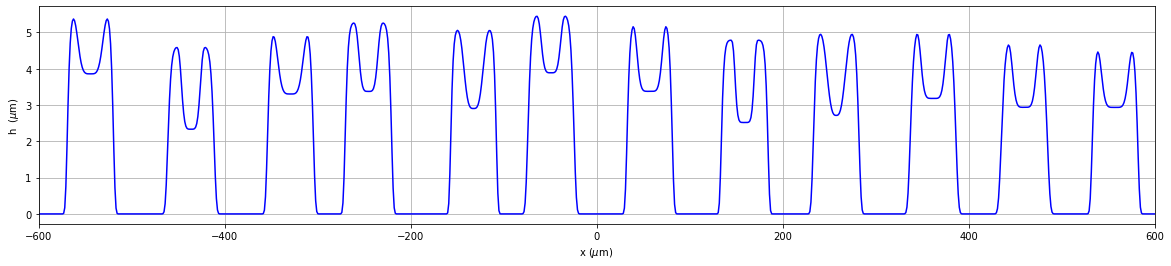

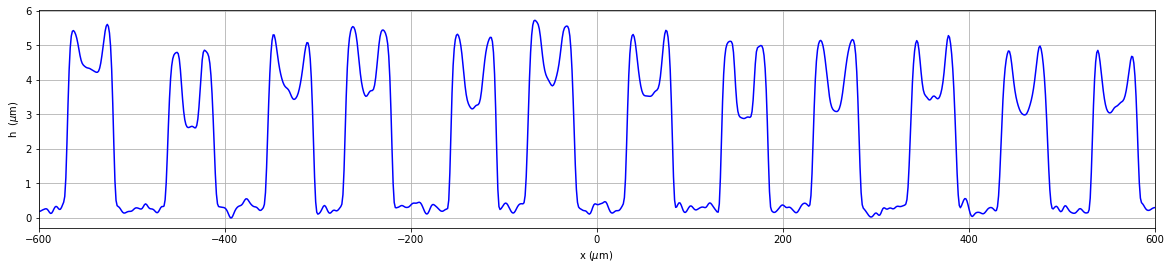

In [46]:
period = 100*um 
num_periods = 12
params_supergaussian = {}
params_supergaussian['period'] = period
params_supergaussian['num_periods'] = num_periods
params_supergaussian['x0']=rand_parameters(num_periods, 0, period/8)
params_supergaussian['h1']=rand_parameters(num_periods, 5, .25)
params_supergaussian['sigma1']=rand_parameters(num_periods, 25, .25)
params_supergaussian['beta1']=rand_parameters(num_periods, 12, 2)
params_supergaussian['h2']=rand_parameters(num_periods, 2, .25)
params_supergaussian['sigma2']=rand_parameters(num_periods, 12, 2)
params_supergaussian['beta2']=rand_parameters(num_periods, 5, 1)

x = np.linspace(-period/2*num_periods, period/2*num_periods, 1024)
exp_3 = Generate_rough_surface(x=x)

profile, profile_noise, profile_clean = exp_3.profile_supergaussian(std_noise=0.0*um, lc_noise=5*um,  **params_supergaussian)
profile, profile_noise, profile_clean = exp_3.profile_supergaussian(std_noise=0.1*um, lc_noise=5*um,  **params_supergaussian)

## Visualizar

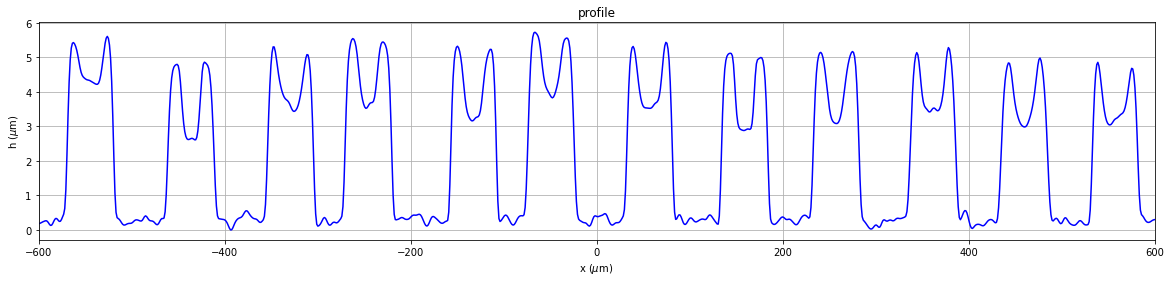

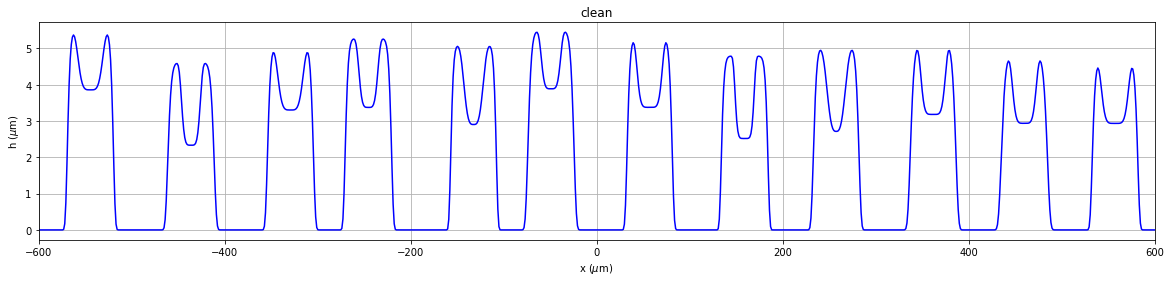

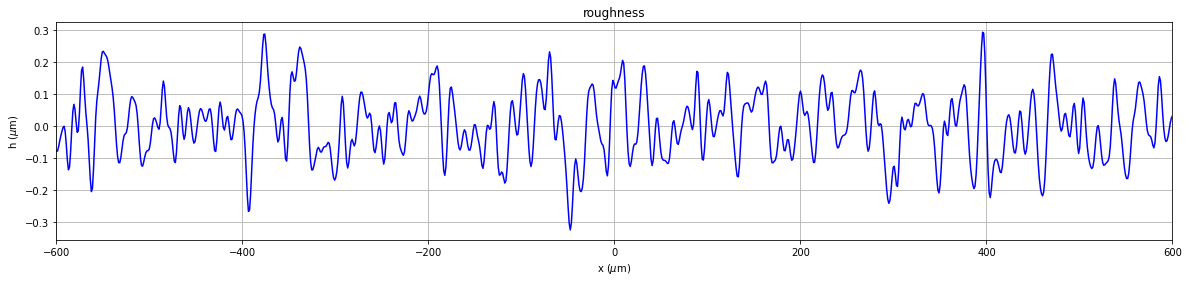

In [47]:
exp_3.draw_profile(kind='profile', title = 'profile')
exp_3.draw_profile(kind='clean', title = 'clean')
exp_3.draw_profile(kind='roughness', title = 'roughness')


# Guardar datos

Guarda los valores x,y  y además un archivo .mat con los datos del perfil (valores de parámetros, etc.)

Se pueden guardar cualquiera de los perfiles:

- 'profile'
- 'clean'
- 'roughness'

In [43]:
exp_3.save_profile("prueba", kind='profile', add_name='_m_1', params_supergaussian=params_supergaussian)



Crea los archivos prueba_

- prueba_m_1.txt
- prueba_m_1.mat
- prueba_m_1.npz

Si no se pone nada en params_supergaussian no crea el archivo .mat



# Ejemplo de varios perfiles: variación del ruido

In [68]:
## Parámetros base

period = 100*um 
num_periods=8

params_supergaussian = {}
params_supergaussian['period']= period
params_supergaussian['num_periods']= num_periods
params_supergaussian['x0']=0*um
params_supergaussian['lc_noise']=2*um
params_supergaussian['h1']=5*um
params_supergaussian['sigma1']=25*um
params_supergaussian['beta1']=14.5
params_supergaussian['h2']=1*um
params_supergaussian['sigma2']=5*um
params_supergaussian['beta2']=6


In [69]:
x = np.linspace(-period/2*num_periods, period/2*num_periods, 1024)
exp_3 = Generate_rough_surface(x=x)


In [ ]:
exp_3.profile_supergaussian(std_noise=noise,  **params_supergaussian, has_draw=True)
exp_3.save_profile("Profile_noise_", kind='profile', add_name='n_{}'.format(i))


0/10: 0.00


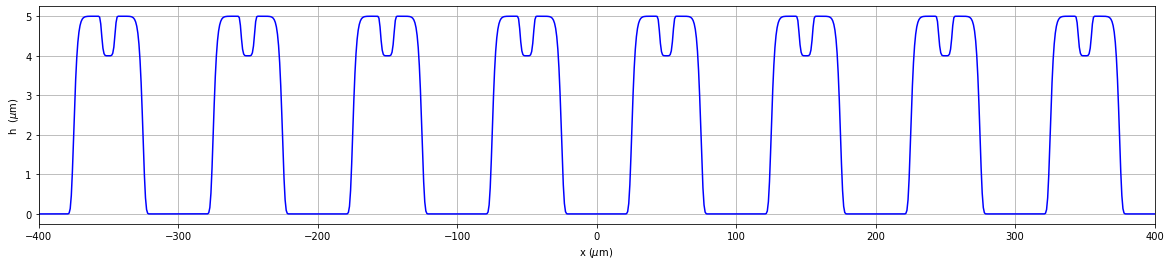

1/10: 0.02


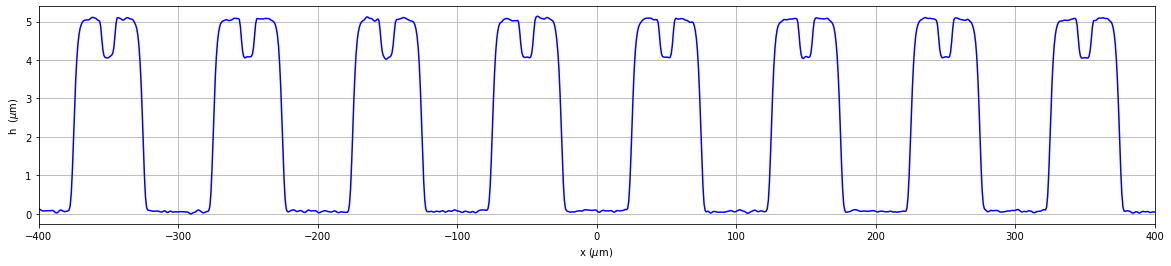

2/10: 0.04


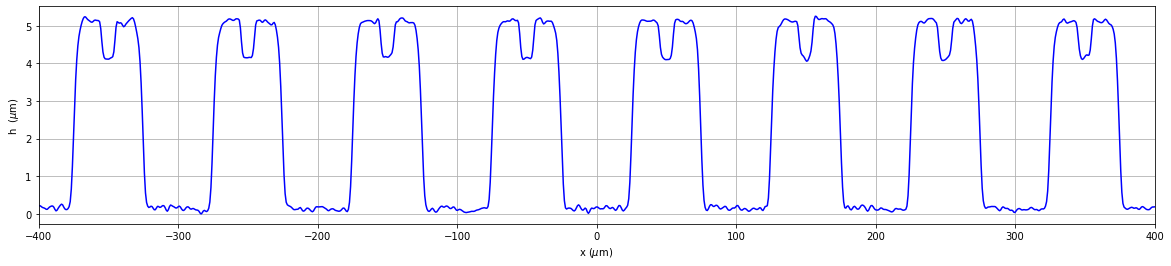

3/10: 0.07


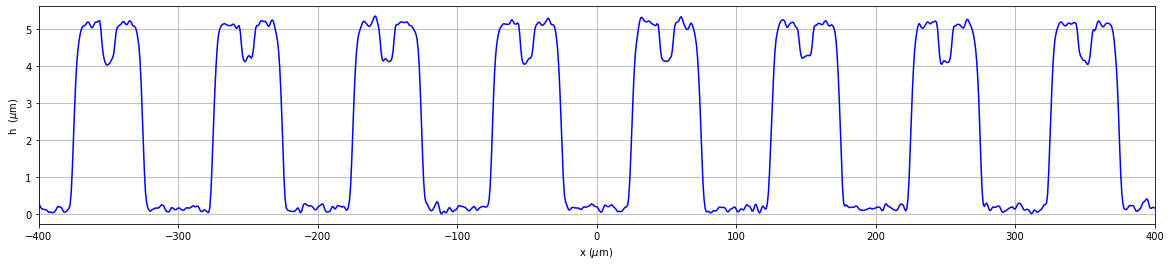

4/10: 0.09


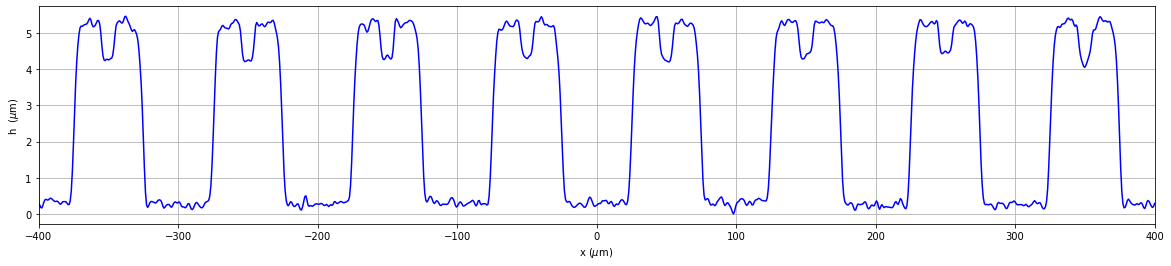

5/10: 0.11


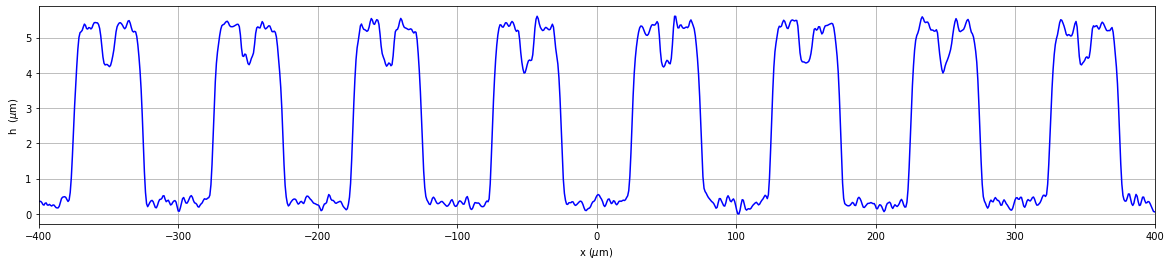

6/10: 0.13


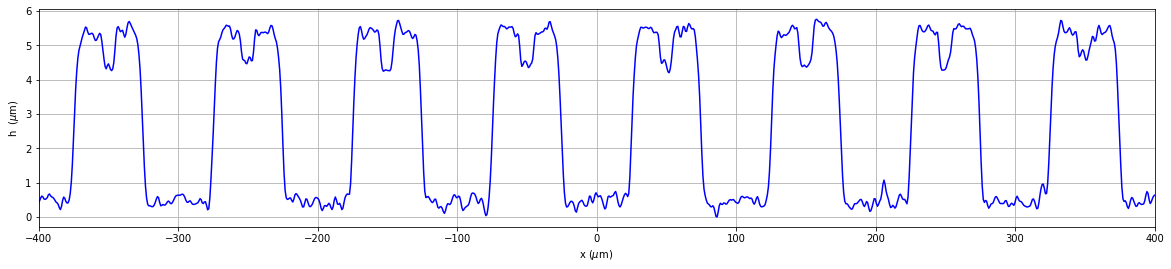

7/10: 0.16


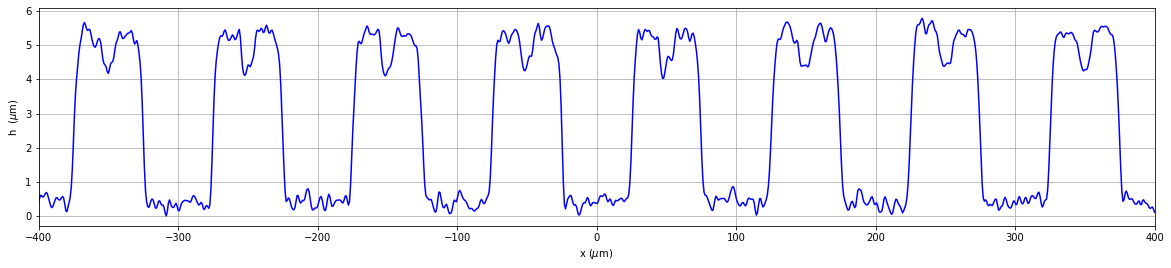

8/10: 0.18


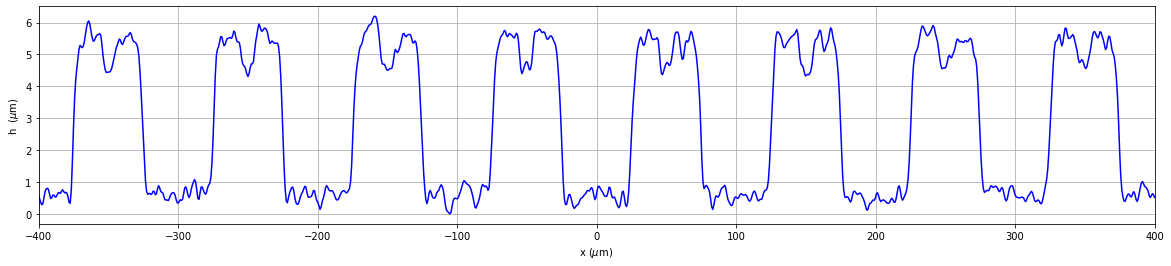

9/10: 0.20


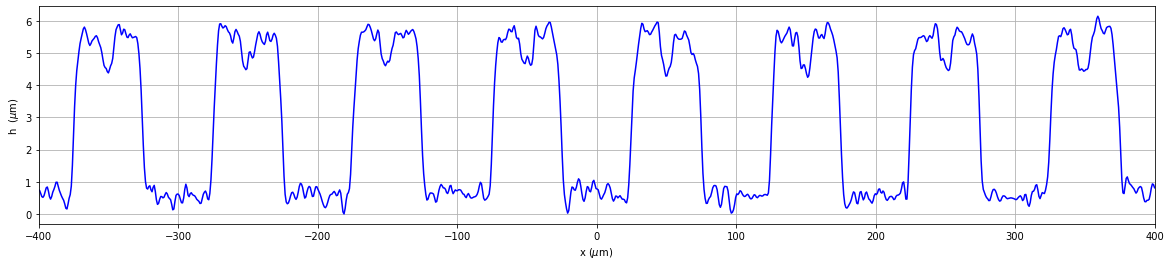

In [72]:
Noises = np.linspace(0,.2, 10)

for i, noise in enumerate(Noises):
    print("{}/{}: {:2.2f}".format(i,len(Noises),noise))

    exp_3.profile_supergaussian(std_noise=noise,  **params_supergaussian, has_draw=True)
    exp_3.save_profile("Profile_noise_", kind='profile', add_name='n_{}'.format(i))



<div class="alert alert-block alert-success">
    
<b>Nota:</b>
    
Por supuesto, no es necesario sacar los dibujos para poder generarlo. Simplemente has_draw = False.    
</div>



# Ejemplo de varios perfiles: variación del ruido

In [ ]:
## Parámetros base

period = 100*um 
num_periods=8

params_supergaussian = {}
params_supergaussian['period']= period
params_supergaussian['num_periods']= num_periods
params_supergaussian['x0']=0*um
params_supergaussian['lc_noise']=2*um
params_supergaussian['std_noise']=.1*um
params_supergaussian['h1']=5*um
params_supergaussian['sigma1']=25*um
params_supergaussian['beta1']=14.5
params_supergaussian['h2']=1*um
params_supergaussian['sigma2']=5*um
params_supergaussian['beta2']=6


In [ ]:
x = np.linspace(-period/2*num_periods, period/2*num_periods, 1024)
exp_3 = Generate_rough_surface(x=x)


0/6: 5.00


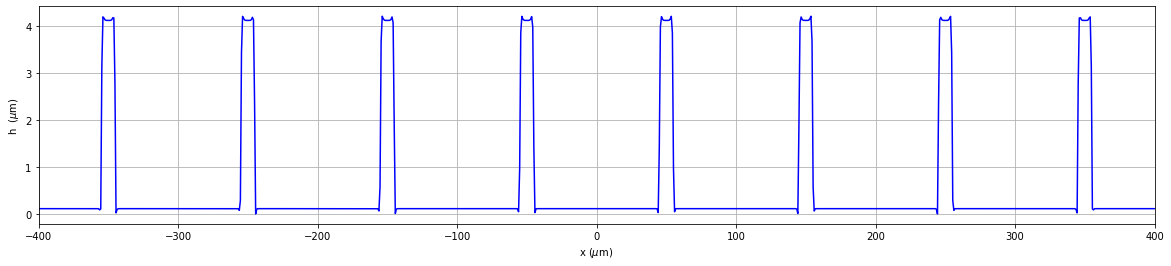

1/6: 9.00


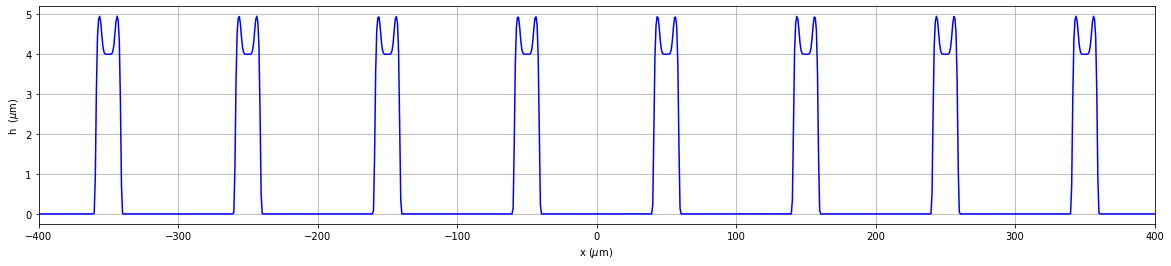

2/6: 13.00


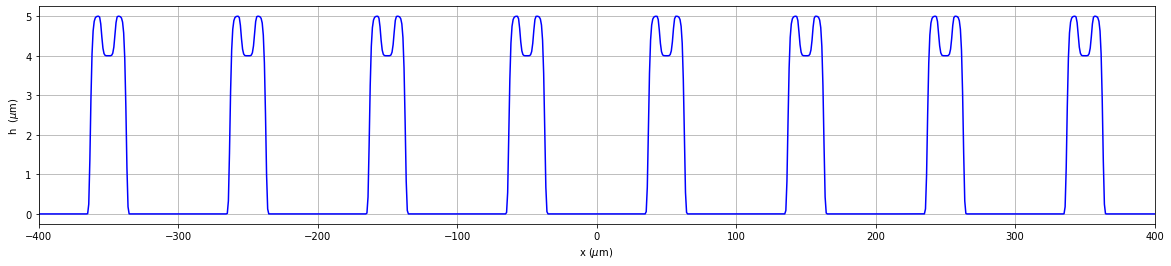

3/6: 17.00


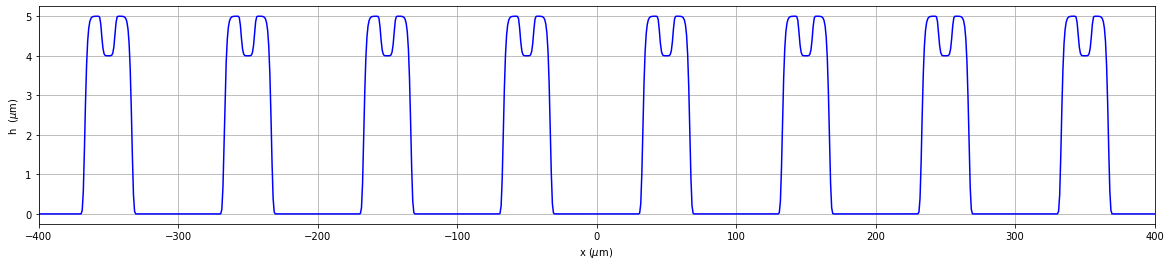

4/6: 21.00


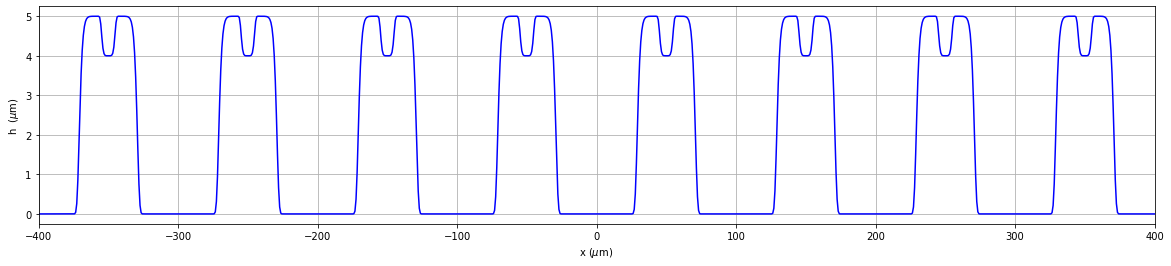

5/6: 25.00


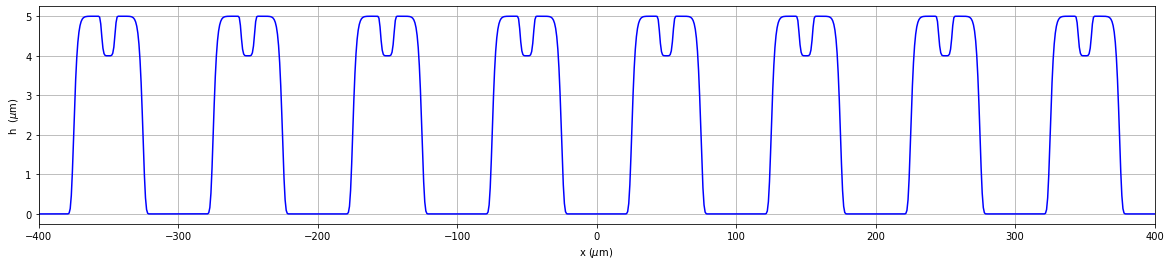

In [76]:
Sigmas1 = np.linspace(5, 25, 6)

for i, sigma1 in enumerate(Sigmas1):
    print("{}/{}: {:2.2f}".format(i,len(Sigmas1),sigma1))
    params_supergaussian['sigma1']=sigma1

    exp_3.profile_supergaussian(**params_supergaussian, has_draw=True)
    exp_3.save_profile("Profile_noise_", kind='profile', add_name='s1_{}'.format(i))


